In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Zadanie 1

In [13]:
class Agent:
    def __init__(self, t: int, position: tuple[int, int]) -> None:
        self.t = t
        self.position = position
        self.old_position = None
        
    def move(self, new_position: tuple[int, int]) -> None:
        self.old_position = self.position
        self.position = new_position
        
    def stay(self) -> None:
        self.old_position = self.position
        
    def move_back(self) -> None:
        self.position = self.old_position
        self.old_position = None
    
    def __hash__(self) -> int:
        return hash((*self.position, *self.new_position))

class Automaton:
    def __init__(self, size: float, init_prob: float, min_n_neigh: float, types: list[int]) -> None:
        self.size = size
        self.init_prob = init_prob
        self.min_n_neigh = min_n_neigh
        self.types = types
        
        self.map = np.zeros((self.size, self.size))
        self.agents = {t: [] for t in self.types}
        self.init_agents()
        
    def init_agents(self) -> None:
        # generate map
        self.map = np.random.choice(self.types, size=(self.size, self.size))
        mask = np.random.random((self.size, self.size))
        self.map[mask > self.init_prob] = 0
        
        # generate agents based on the map
        for x in range(self.size):
            for y in range(self.size):
                t = self.map[x, y]
                if t > 0:
                    agent = Agent(t, (x, y))
                    self.agents[t].append(agent)
                    self.map[x, y] = t
                    
    def simulate_turn(self) -> None:
        agent_count = np.zeros((self.size, self.size))
        
        # move
        for t, agents in self.agents.items():
            for agent in agents:
                n_neigh = self._count_neighbors(t, *agent.position)
                if n_neigh < self.min_n_neigh:
                    agent_neigh = list(self._generate_neigh(*agent.position))
                    new_position = random.choice(agent_neigh)
                    agent.move(new_position)
                    agent_count[new_position[0], new_position[1]] += 1
                else:
                    agent.stay()
                    
        # move back if needed
        self.map = np.zeros((self.size, self.size))
        for t, agents in self.agents.items():
            for agent in agents:
                if agent_count[agent.position[0], agent.position[1]] > 1:
                    agent.move_back()

                self.map[agent.position[0]][agent.position[1]] = t
                    
    def run(self, n: int) -> None:
        for _ in range(n):
            self.simulate_turn()
                    
    def get_map(self) -> np.ndarray:
        map_ = np.zeros((self.size, self.size))
        for t, agents in self.agents.items():
            for agent in agents:
                map_[agent.position[0], agent.position[1]] = t
        return map_.astype(int)
                    
    def _count_neighbors(self, t: int, x: int, y: int) -> int:
        count = 0
        for x, y in self._generate_neigh(x, y):
            if self.map[x][y] == t:
                count += 1
        return count
    
    def _generate_neigh(self, x: int, y: int) -> list[tuple[int, int]]:
        for new_x, new_y in [(x - 1, y), (x - 1, y + 1), (x, y + 1), (x + 1, y + 1), (x + 1, y), (x + 1, y - 1), (x, y - 1), (x - 1, y - 1)]:
            new_x = min(max(new_x, 0), self.size - 1)
            new_y = min(max(new_y, 0), self.size - 1)
            yield (new_x, new_y)

In [14]:
A = Automaton(size=20, init_prob=0.65, min_n_neigh=4, types=[1, 2])

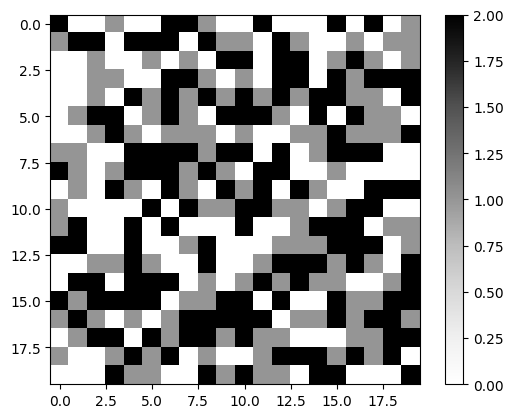

In [15]:
plt.imshow(A.get_map(), cmap='Greys')
plt.colorbar()
plt.show()

In [16]:
A.run(10000)

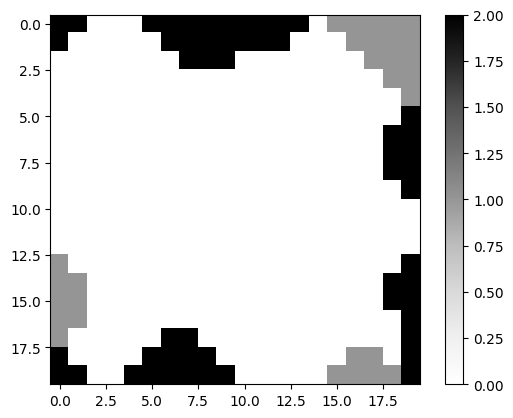

In [17]:
plt.imshow(A.get_map(), cmap='Greys')
plt.colorbar()
plt.show()